# Лабораторная работа №5. Преобразование Хафа

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks

## Поиск прямых

In [ ]:
I1 = cv.imread('wtc.jpeg')
I2 = cv.imread('de_stijl.jpg')
I3 = cv.imread('lines.png')

(-0.5, 294.5, 170.5, -0.5)

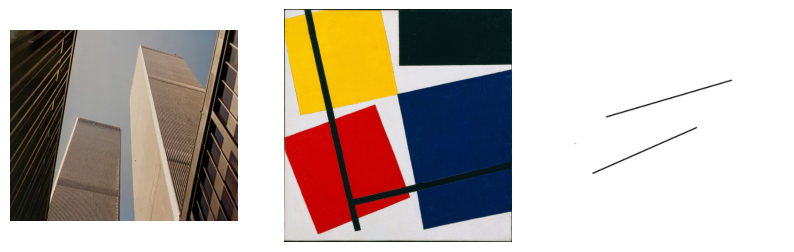

In [ ]:
I1 = cv.cvtColor(I1, cv.COLOR_RGB2BGR)
I2 = cv.cvtColor(I2, cv.COLOR_RGB2BGR)
fig, axs = plt.subplots(1, 3, figsize = (10, 10))
plt.sca(axs[0])
plt.imshow(I1)
plt.axis('off')
plt.sca(axs[1])
plt.imshow(I2)
plt.axis('off')
plt.sca(axs[2])
plt.imshow(I3)
plt.axis('off')

(-0.5, 294.5, 170.5, -0.5)

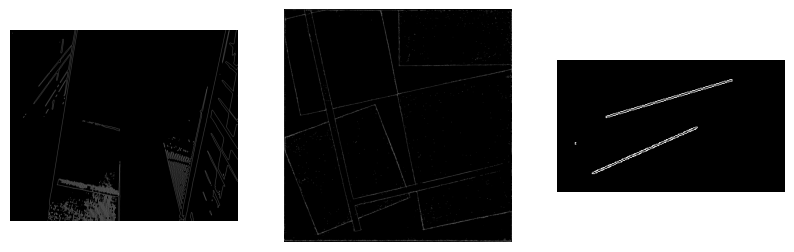

In [ ]:
_, I1_thresh = cv.threshold(cv.blur(cv.cvtColor(I1, cv.COLOR_BGR2GRAY), (9, 9)), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
I1_laplace = cv.Laplacian(I1_thresh, cv.CV_8U)
I2_canny = cv.Canny(I2, 150, 200)
I3_canny = cv.Canny(I3, 150, 200)
fig, axs = plt.subplots(1, 3, figsize = (10, 10))
plt.sca(axs[0])
plt.imshow(I1_laplace, cmap='gray')
plt.axis('off')
plt.sca(axs[1])
plt.imshow(I2_canny, cmap='gray')
plt.axis('off')
plt.sca(axs[2])
plt.imshow(I3_canny, cmap='gray')
plt.axis('off')

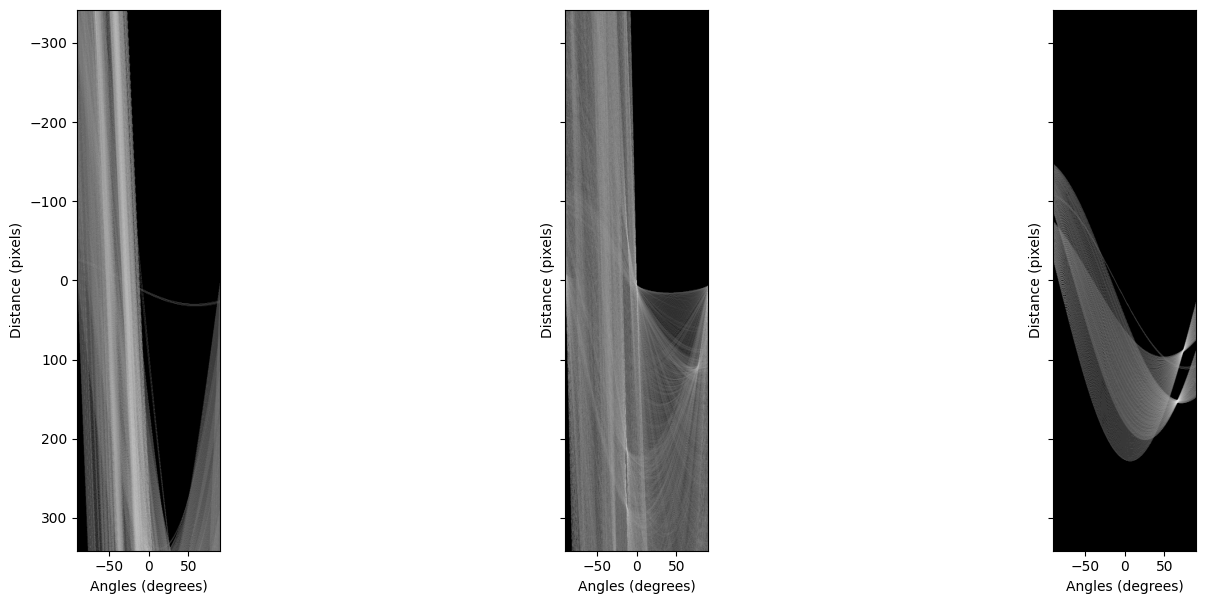

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15, 6), sharex=True, sharey=True)
fig.tight_layout()
for idx, image in enumerate([I1_laplace, I2_canny, I3_canny]):
  tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
  h, theta, d = hough_line(image, theta=tested_angles)
  angle_step = 0.5 * np.diff(theta).mean()
  d_step = 0.5 * np.diff(d).mean()
  bounds = [
      np.rad2deg(theta[0] - angle_step),
      np.rad2deg(theta[-1] + angle_step),
      d[-1] + d_step,
      d[0] - d_step,
  ]
  plt.sca(axs[idx])
  plt.imshow(np.log(1 + h), extent=bounds, cmap='gray')
  #plt.title('Hough transform')
  plt.xlabel('Angles (degrees)')
  plt.ylabel('Distance (pixels)')

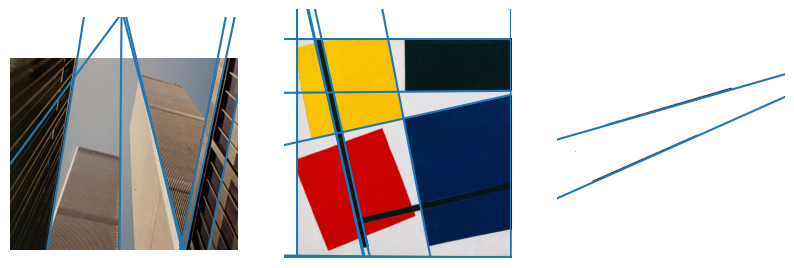

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (10, 10))
plt.sca(axs[0])
plt.imshow(I1)
plt.axis('off')
plt.sca(axs[1])
plt.imshow(I2)
plt.axis('off')
plt.sca(axs[2])
plt.imshow(I3)
plt.axis('off')
for idx, image in enumerate([I1_laplace, I2_canny, I3_canny]):
  tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
  h, theta, d = hough_line(image, theta=tested_angles)
  angle_step = 0.5 * np.diff(theta).mean()
  d_step = 0.5 * np.diff(d).mean()
  bounds = [
      np.rad2deg(theta[0] - angle_step),
      np.rad2deg(theta[-1] + angle_step),
      d[-1] + d_step,
      d[0] - d_step,
  ]
  for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
      (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
      plt.sca(axs[idx])
      plt.axline((x0, y0), slope=np.tan(angle + np.pi / 2))

## Поиск окружностей


Как я понял, здесь нужно запустить поиск окружностей после применения дифференциального оператора, так и с исходного изображения непосредственно и сравнить полученные окружности

### Картинка 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread
from skimage.filters import *
from skimage.morphology import disk


In [ ]:
image = imread('dora.jpg', as_gray=True)
image2 = image.copy()

(-0.5, 1079.5, 1404.5, -0.5)

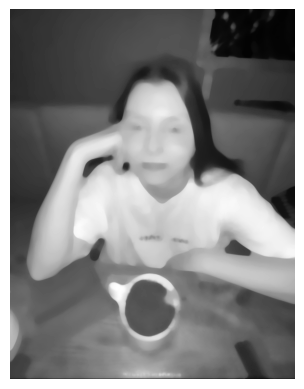

In [ ]:
image_blurred = median(image, disk(19))
plt.imshow(image_blurred, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 1404.5, -0.5)

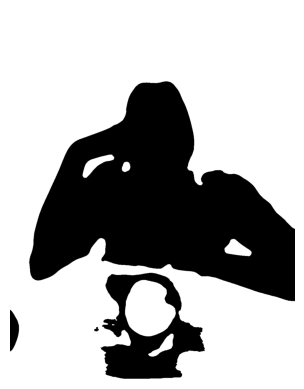

In [ ]:
image_otsu = image_blurred <= threshold_otsu(image_blurred)
plt.imshow(image_otsu, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 1404.5, -0.5)

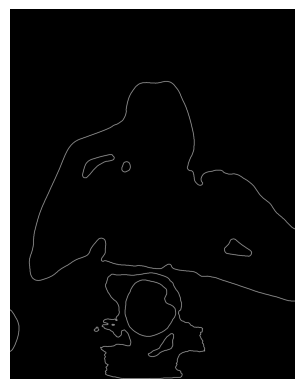

In [ ]:
edge_sobel = sobel(image_otsu)
plt.imshow(edge_sobel, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 1404.5, -0.5)

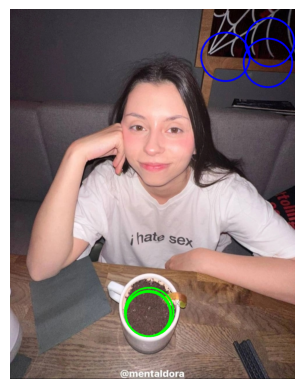

In [ ]:
I = cv.cvtColor(cv.imread('dora.jpg'), cv.COLOR_RGB2BGR)
# Detect between these radius
hough_radii = np.arange(80, 100, 2)


# after diff operator
hough_res = hough_circle(edge_sobel, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)
for (y, x, r) in zip(cy, cx, radii):
    cv.circle(I, (x, y), r, (0, 255, 0), 5)
# just image
hough_res = hough_circle(image2, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)
for (y, x, r) in zip(cy, cx, radii):
    cv.circle(I, (x, y), r, (0, 0, 255), 5)

plt.imshow(I)
plt.axis('off')

### Картинка 2

(-0.5, 1079.5, 759.5, -0.5)

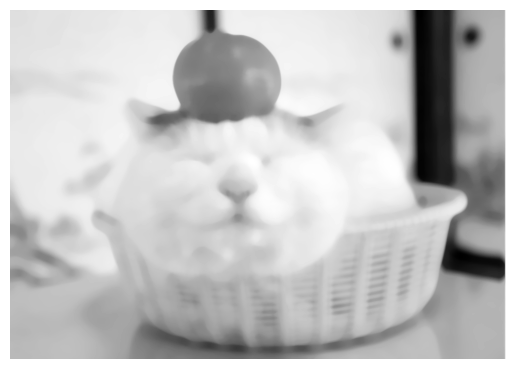

In [ ]:
image = imread('orange.jpg', as_gray=True)
image2 = image.copy()

image_blurred = median(image, disk(13))
plt.imshow(image_blurred, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 759.5, -0.5)

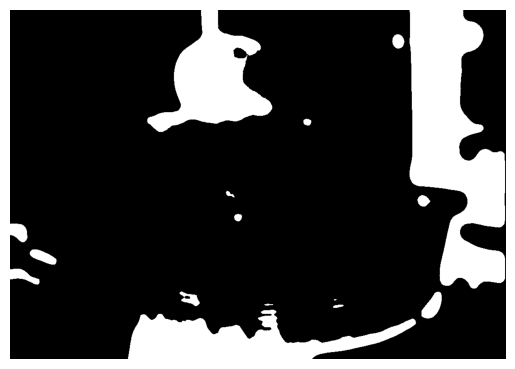

In [ ]:
image_otsu = image_blurred <= threshold_otsu(image_blurred)
plt.imshow(image_otsu, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 759.5, -0.5)

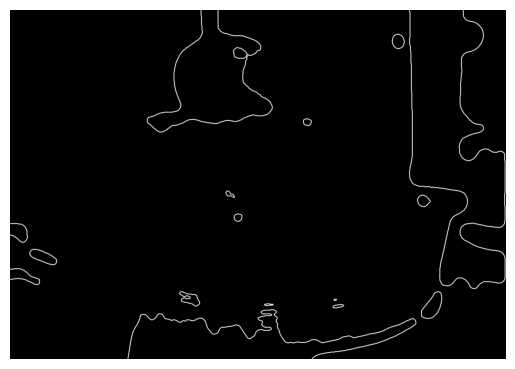

In [ ]:
edge_sobel = sobel(image_otsu)
plt.imshow(edge_sobel, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 759.5, -0.5)

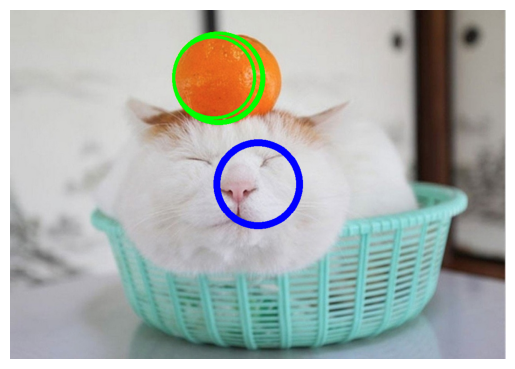

In [ ]:
I = cv.cvtColor(cv.imread('orange.jpg'), cv.COLOR_RGB2BGR)


# Detect between these radius
hough_radii = np.arange(80, 100, 2)


# after diff operator
hough_res = hough_circle(edge_sobel, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)
for (y, x, r) in zip(cy, cx, radii):
    cv.circle(I, (x, y), r, (0, 255, 0), 5)
# just image
hough_res = hough_circle(image2, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)
for (y, x, r) in zip(cy, cx, radii):
    cv.circle(I, (x, y), r, (0, 0, 255), 5)

plt.imshow(I)
plt.axis('off')

### Картинка 1

(-0.5, 1079.5, 827.5, -0.5)

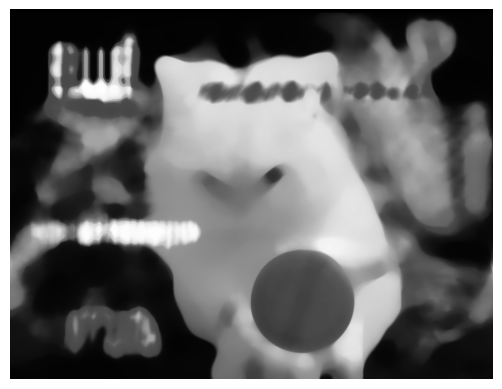

In [ ]:
image = imread('coil.jpg', as_gray=True)
image2 = image.copy()

image_blurred = median(image, disk(27))
plt.imshow(image_blurred, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 827.5, -0.5)

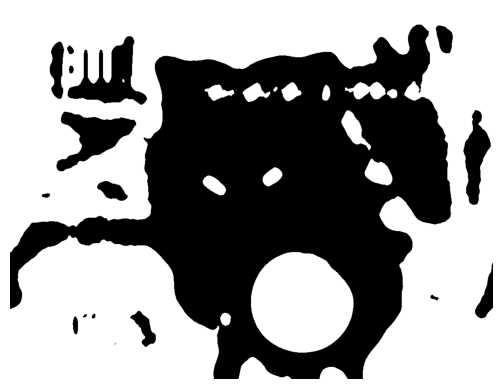

In [ ]:
image_otsu = image_blurred <= threshold_otsu(image_blurred)
plt.imshow(image_otsu, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 827.5, -0.5)

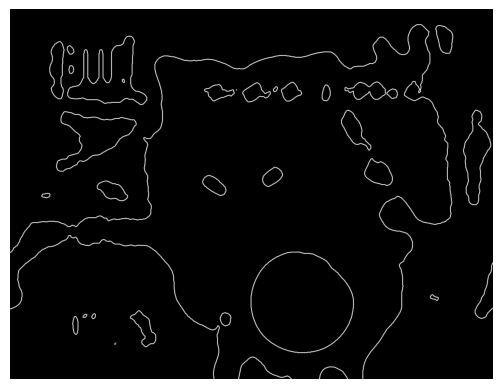

In [ ]:
edge_sobel = sobel(image_otsu)
plt.imshow(edge_sobel, cmap='gray'); plt.axis('off')

(-0.5, 1079.5, 827.5, -0.5)

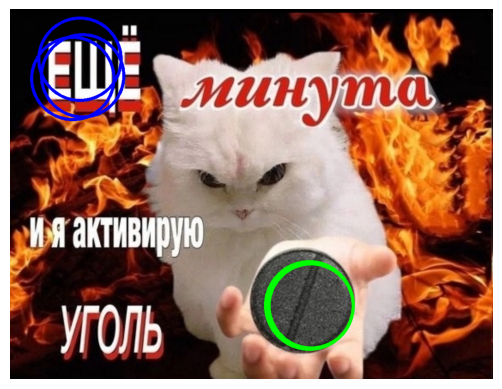

In [ ]:
I = cv.cvtColor(cv.imread('coil.jpg'), cv.COLOR_RGB2BGR)


# Detect between these radius
hough_radii = np.arange(80, 100, 2)


# after diff operator
hough_res = hough_circle(edge_sobel, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)
for (y, x, r) in zip(cy, cx, radii):
    cv.circle(I, (x, y), r, (0, 255, 0), 5)
# just image
hough_res = hough_circle(image2, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)
for (y, x, r) in zip(cy, cx, radii):
    cv.circle(I, (x, y), r, (0, 0, 255), 5)

plt.imshow(I)
plt.axis('off')